# Using Python for Research Homework: Week 4, Case Study 2

In this case study, we will continue taking a look at patterns of flight for each of the three birds in our dataset.

In [33]:
# DO NOT EDIT THIS CODE
import pandas as pd
import numpy as np
birddata = pd.read_csv("https://courses.edx.org/asset-v1:HarvardX+PH526x+2T2019+type@asset+block@bird_tracking.csv", index_col=0)
birddata.head(10)
type(birddata.date_time[0])

str

### Exercise 1

In this case study, we will continue taking a look at patterns of flight for each of the three birds in our dataset. We will group the flight patterns by bird and date, and plot the mean altitude for these groupings.

`pandas` makes it easy to perform basic operations on groups within a dataframe without needing to loop through each value in the dataframe. In this exercise, we will group the dataframe by `birdname` and then find the average `speed_2d` for each bird.

#### Instructions 
- Fill in the code to find the mean altitudes of each bird using the pre-loaded `birddata` dataframe. 

In [26]:
# First, use `groupby()` to group the data by "bird_name".
grouped_birds = birddata.groupby(birddata.bird_name)
grouped_birds.head()

# Now calculate the mean of `speed_2d` using the `mean()` function.
mean_speeds = grouped_birds.speed_2d.mean() 
mean_speeds

# Find the mean `altitude` for each bird.
mean_altitudes = grouped_birds.altitude.mean()
mean_altitudes

bird_name
Eric     60.249406
Nico     67.900478
Sanne    29.159922
Name: altitude, dtype: float64

### Exercise 2

In this exercise, we will group the flight times by date and calculate the mean altitude within that day.

#### Instructions 
- Convert `birddata.date_time` to the `pd.datetime` format, and store as `birddata["date"]`.
- Fill in the code to find the mean altitudes for each day.

In [44]:
# Convert birddata.date_time to the `pd.datetime` format.
birddata.date_time = pd.to_datetime(birddata.date_time)

# Create a new column of day of observation
birddata["date"] = pd.Series([x.to_period('D') for x in birddata.date_time], index=birddata.index)


# Use `groupby()` to group the data by date.
grouped_bydates = birddata.groupby(birddata.date) 

# Find the mean `altitude` for each date.
mean_altitudes_perday = grouped_bydates.altitude.mean()
mean_altitudes_perday['2013-09-12']

<ipython-input-44-9dac4f43c60a>:5: UserWarning: Converting to Period representation will drop timezone information.
  birddata["date"] = pd.Series([x.to_period('D') for x in birddata.date_time], index=birddata.index)


75.64609053497942

### Exercise 3

In this exercise, we will group the flight times by both bird and date, and calculate the mean altitude for each.

#### Instructions 
- `birddata` already contains the `date` column. To find the average speed for each bird and day, create a new grouped dataframe called `grouped_birdday` that groups the data by both `bird_name` and date.

In [58]:
# Use `groupby()` to group the data by bird and date.
grouped_birdday = birddata.groupby([birddata.date, birddata.bird_name])

# Find the mean `altitude` for each bird and date.
mean_altitudes_perday = grouped_birdday.altitude.mean()
mean_altitudes_perday['2013-08-18']
birddata.groupby([birddata.bird_name, birddata.date]).speed_2d.mean()['Eric']

date
2013-08-15    2.121517
2013-08-16    2.618113
2013-08-17    1.765809
2013-08-18    2.951171
2013-08-19    2.435545
                ...   
2014-04-26    2.262308
2014-04-27    2.667432
2014-04-28    2.159156
2014-04-29    2.371772
2014-04-30    2.548936
Freq: D, Name: speed_2d, Length: 252, dtype: float64

### Exercise 4

Great! Now find the average speed for each bird and day.

#### Instructions 

- Store these are three `pandas` `Series` objects, one for each bird.
- Use the plotting code provided to plot the average speeds for each bird.

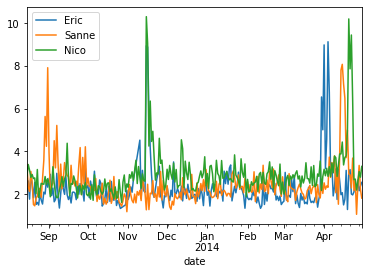

In [59]:
import matplotlib.pyplot as plt

eric_daily_speed  = birddata.groupby([birddata.bird_name, birddata.date]).speed_2d.mean()['Eric']
sanne_daily_speed = birddata.groupby([birddata.bird_name, birddata.date]).speed_2d.mean()['Sanne']
nico_daily_speed  = birddata.groupby([birddata.bird_name, birddata.date]).speed_2d.mean()['Nico']

eric_daily_speed.plot(label="Eric")
sanne_daily_speed.plot(label="Sanne")
nico_daily_speed.plot(label="Nico")
plt.legend(loc="upper left")
plt.show()

In [60]:
nico_daily_speed['2014-04-04']

2.8324654508684057